## <center> Prova [02] - Inteligência Artificial / UFPB - 2021.2 </center>
**Discente:** Lucas Gomes Dantas <br>
**Matrícula:** 20200082925 <br>
**Dataset:** <a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>


***

> **[*] Ambiente e Dependências**

In [25]:
from statistics import mode

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix, classification_report)
from tensorflow import keras
from keras import (datasets, layers, models, optimizers)
from keras.optimizers import rmsprop_v2


**1 -** Utilizando a base de dados de <a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>, elabore uma solução para identificar o OUTPUT Grade do estudante.  <br>


> **[#] Dataset**

In [26]:
dstudent = pd.read_csv('student_prediction.csv')
dstudent.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


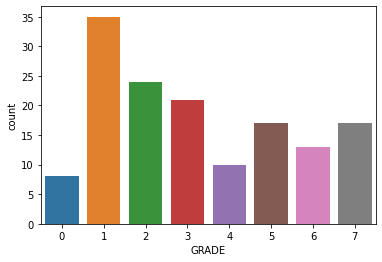

In [27]:
graphstd = sns.countplot(dstudent['GRADE'], label = 'Count')
plt.show()

>>> Acurácia - Grade

In [28]:
dstudent_copy = dstudent.copy()

dstudent_copy.drop('STUDENTID', axis=1)

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


In [29]:
X = dstudent_copy.iloc[:, :-1].values
y = dstudent_copy.iloc[:, -1].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [31]:
print("X_train grade",X_train.shape)
print("X_test grade",X_test.shape)

X_train grade (116, 32)
X_test grade (29, 32)


In [32]:
model = models.Sequential()

model.add(layers.Dense(units = 9, activation='relu'))
model.add(layers.Dense(units =6, activation='relu'))
model.add(layers.Dense(units =6, activation='relu'))
model.add(layers.Dense(units =1, activation='sigmoid'))

In [33]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [34]:
model.compile(
    optimizer=optimizer, 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [35]:
history = model.fit(
      X_train,
      y_train,
      epochs=150,
      verbose = False,
      )

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 3 0 0 0 0]
 [0 6 0 0 0 0]
 [0 4 0 0 0 0]
 [0 5 0 0 0 0]
 [0 4 0 0 0 0]
 [0 7 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.21      1.00      0.34         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7

    accuracy                           0.21        29
   macro avg       0.03      0.17      0.06        29
weighted avg       0.04      0.21      0.07        29



> **1 [A]** - Faça o pré-processamento dos dados (limpeza, engenharia de variáveis, etc) e deixe os seus dados preparados para aplicar o modelo.<br>


>> **[#] Pré-processamento**

In [ ]:
dstudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AGE            145 non-null    int64
 1   GENDER         145 non-null    int64
 2   HS_TYPE        145 non-null    int64
 3   SCHOLARSHIP    145 non-null    int64
 4   WORK           145 non-null    int64
 5   ACTIVITY       145 non-null    int64
 6   PARTNER        145 non-null    int64
 7   SALARY         145 non-null    int64
 8   TRANSPORT      145 non-null    int64
 9   LIVING         145 non-null    int64
 10  MOTHER_EDU     145 non-null    int64
 11  FATHER_EDU     145 non-null    int64
 12  #_SIBLINGS     145 non-null    int64
 13  KIDS           145 non-null    int64
 14  MOTHER_JOB     145 non-null    int64
 15  FATHER_JOB     145 non-null    int64
 16  STUDY_HRS      145 non-null    int64
 17  READ_FREQ      145 non-null    int64
 18  READ_FREQ_SCI  145 non-null    int64
 19  ATTEND_D

In [ ]:
dstudent.shape

(145, 32)

In [36]:
dstudent.describe(include=object)

,STUDENTID
count,145
unique,145
top,STUDENT1
freq,1


>>> Apresenta a disposição dos dados para os atributos do tipo object e sua incidência de valores e singularidade.

In [ ]:
dstudent = dstudent.drop('STUDENTID', axis=1)

>>> Removendo atributo de valor único, pois é irrelevante ao contexto.

In [ ]:
double = dstudent[dstudent.duplicated()]
double

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE


>>> Verificando se há atributos duplicados no dataset.

In [ ]:
corr = dstudent.corr()
corr.style.background_gradient(cmap = "coolwarm")

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
AGE,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,-0.068972,-0.070108,0.069748,0.172668,-0.200812,-0.141571,-0.172833,0.059712,0.078849,-0.226882,0.007306,0.060027,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
GENDER,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,0.062370,0.120638,0.060216,-0.028781,-0.056143,-0.033997,-0.067750,0.045206,-0.005233,-0.363971,-0.144138,-0.065795,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
HS_TYPE,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,-0.166336,-0.134322,0.051827,0.009990,-0.050269,-0.131680,-0.174719,-0.010144,0.050529,-0.009101,0.124317,-0.032180,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
SCHOLARSHIP,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,-0.109006,-0.222776,-0.037831,-0.005450,0.023919,-0.012785,0.003758,0.008877,0.061543,0.214838,0.041443,-0.141190,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
WORK,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,0.153780,0.205138,-0.134003,-0.165492,-0.044113,0.005919,-0.114824,-0.096332,-0.171384,-0.018640,-0.120973,0.028198,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
ACTIVITY,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,-0.122430,-0.113252,0.143273,-0.057563,-0.161412,0.019123,-0.129342,-0.281283,-0.214557,-0.020602,-0.024023,0.098693,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
PARTNER,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,-0.043001,0.045241,0.033182,-0.128034,-0.211091,-0.176901,0.048897,0.090581,-0.004119,0.103634,0.038636,0.154225,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
SALARY,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,0.123932,0.031212,0.007866,0.101380,0.028451,-0.109689,-0.097935,-0.072357,0.009390,-0.106800,0.059872,0.111506,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
TRANSPORT,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,0.168831,0.090659,-0.253099,-0.033565,0.274118,-0.116259,0.007134,-0.046942,-0.124146,0.059791,0.070998,-0.056759,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
LIVING,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,0.159529,0.206439,-0.276875,-0.059119,0.384892,0.016447,-0.021241,-0.081128,-0.155241,0.179520,0.001039,-0.135860,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


>>> Como não há nenhum par de atributos com correlação muito alta, irão permanecer no dataset.

> **1 [B]** - Faça uma análise exploratória dos dados de saída, utilizando box plot, mostrando a aplicação de técnicas de under ou oversampling para que as classes tenham o mesmo tamanho. <br>

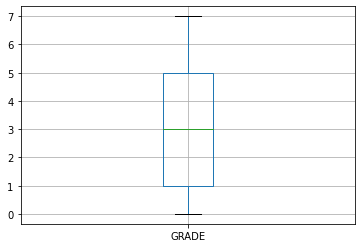

In [37]:
dstudent.boxplot(column=['GRADE'])
plt.show()


In [39]:
dstudent.groupby(['GRADE']).size()

GRADE
0     8
1    35
2    24
3    21
4    10
5    17
6    13
7    17
dtype: int64

> **1 [C]** - Utilize a biblioteca AUTOML para fazer a previsão. Para o melhor algoritmo, teste 3 variações de um dos seus hiperparâmetros. <br>


> **1 [D]** - Para avaliar os resultados, utilize e explique a matriz de confusão. Além disso, escolha 2 métricas de sua preferência e o que o seu resultado significa. <br>

**2 -** Utilize a mesma base de dados (lembrem de tirar o rótulo, obviamente) da questão anterior de forma que:

> **2 [A]** - Execute o K-means e Hierárquico. <br>

> **2 [B]** - Teste o K igual à 5 e 7. <br>

> **2 [C]** - Na execução do Hierárquico, varie 2 métodos do linkage. <br>

> **2 [D]** - Por fim, faça uma comparação entre os 2 resultados das execuções anteriores e adote uma medida de avaliação própria para clusterização. <br>

**BÔNUS** - Diga vantagens e desvantagens do uso do AUTOML e como você faria para usá-lo, garantindo os melhores resultados possíveis. <br>

***

In [ ]:
#!pip3 install math
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install seaborn
#!pip3 install statistics 
#!pip3 install sklearn